In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [29]:
dados = pd.DataFrame({
    'Simbolo':['AAPL','Google','MSFT',
               'AMZN','TSLA','FB'],
    'Preço':[150.12,2700.45,300.89,3200.10,700.78,
             350.40],
    'Volume de negociação':[3000000,1000000,2500000,
                            1200000,5000000,900000],
    'Capitalização de mercado':[2000000000000,18000000000000,
                                22000000000000,1700000000000,
                                75000000000000,9000000000000]
})

In [30]:
dados.head()

,Simbolo,Preço,Volume de negociação,Capitalização de mercado
0,AAPL,150.12,3000000,2000000000000
1,Google,2700.45,1000000,18000000000000
2,MSFT,300.89,2500000,22000000000000
3,AMZN,3200.10,1200000,1700000000000
4,TSLA,700.78,5000000,75000000000000


Text(0.5, 1.0, 'Analisando dados de ações')

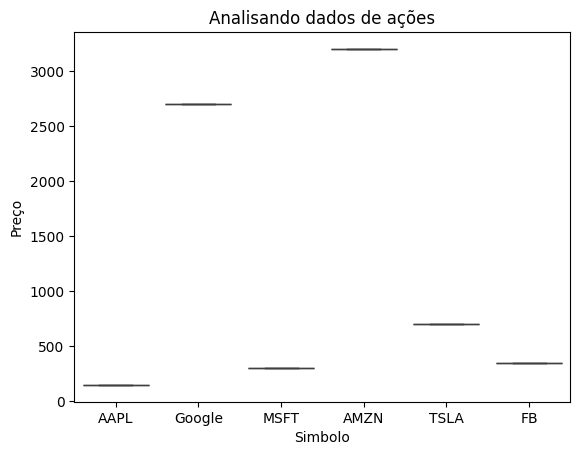

In [31]:
#Plotando o Boxplot
sns.boxplot(x= dados['Simbolo'],y=dados['Preço'])
plt.title('Analisando dados de ações')

In [32]:
# transforma a coluna de simbolos em true ou falso
dados_ativos = pd.get_dummies(dados,columns=['Simbolo']) 

In [34]:
#aplicando o Kmeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(dados_ativos)


KMeans(n_clusters=6)

In [35]:
sse = kmeans.inertia_
print('SSE',sse)

SSE 0.0


In [36]:
#Visualizando o resultado dos agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Preço das ações')

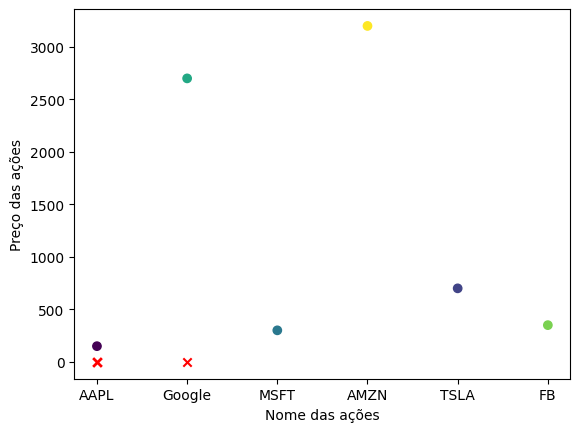

In [38]:
plt.scatter(dados['Simbolo'],dados['Preço'],c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Nome das ações')
plt.ylabel('Preço das ações')

In [40]:
#Analisando os outros grupos restantes
dados_ativos['Grupo'] = labels
grouped_data = dados_ativos.groupby('Grupo').mean()
print(grouped_data)

         Preço  Volume de negociação  Capitalização de mercado  Simbolo_AAPL  \
Grupo                                                                          
0       150.12             3000000.0              2.000000e+12           1.0   
1       700.78             5000000.0              7.500000e+13           0.0   
2       300.89             2500000.0              2.200000e+13           0.0   
3      2700.45             1000000.0              1.800000e+13           0.0   
4       350.40              900000.0              9.000000e+12           0.0   
5      3200.10             1200000.0              1.700000e+12           0.0   

       Simbolo_AMZN  Simbolo_FB  Simbolo_Google  Simbolo_MSFT  Simbolo_TSLA  
Grupo                                                                        
0               0.0         0.0             0.0           0.0           0.0  
1               0.0         0.0             0.0           0.0           1.0  
2               0.0         0.0             0.0